In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score, f1_score
from sklearn import tree

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [271]:
# !pip install lightgbm

In [272]:
df = pd.read_csv("data\mushroom_cleaned.csv")
df.head(3)
df_second = pd.read_csv("data\secondary_data.csv", sep=";")

<Axes: >

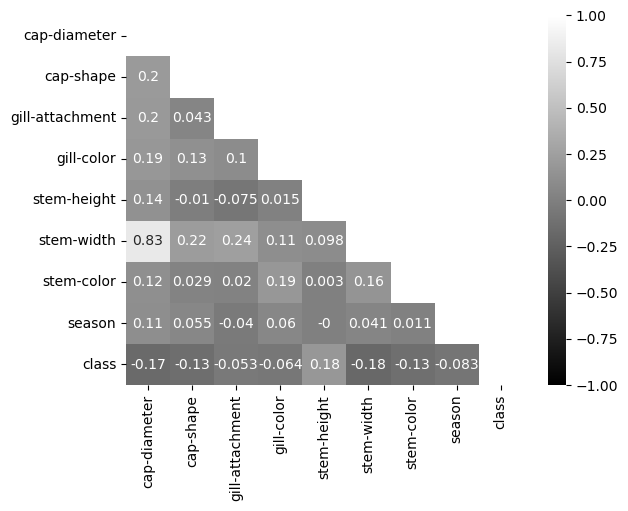

In [273]:
df_corr = df.corr().round(3)

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="gray")

In [274]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [275]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [276]:
features = df.drop(columns=["class"])
target = df["class"]

In [277]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [278]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7189784399000648

In [279]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

knn10 = KNeighborsClassifier(n_neighbors=10)

knn10.fit(X_train_norm, y_train)
pred = knn10.predict(X_test_norm)
knn10.score(X_test_norm, y_test)

0.9900990099009901

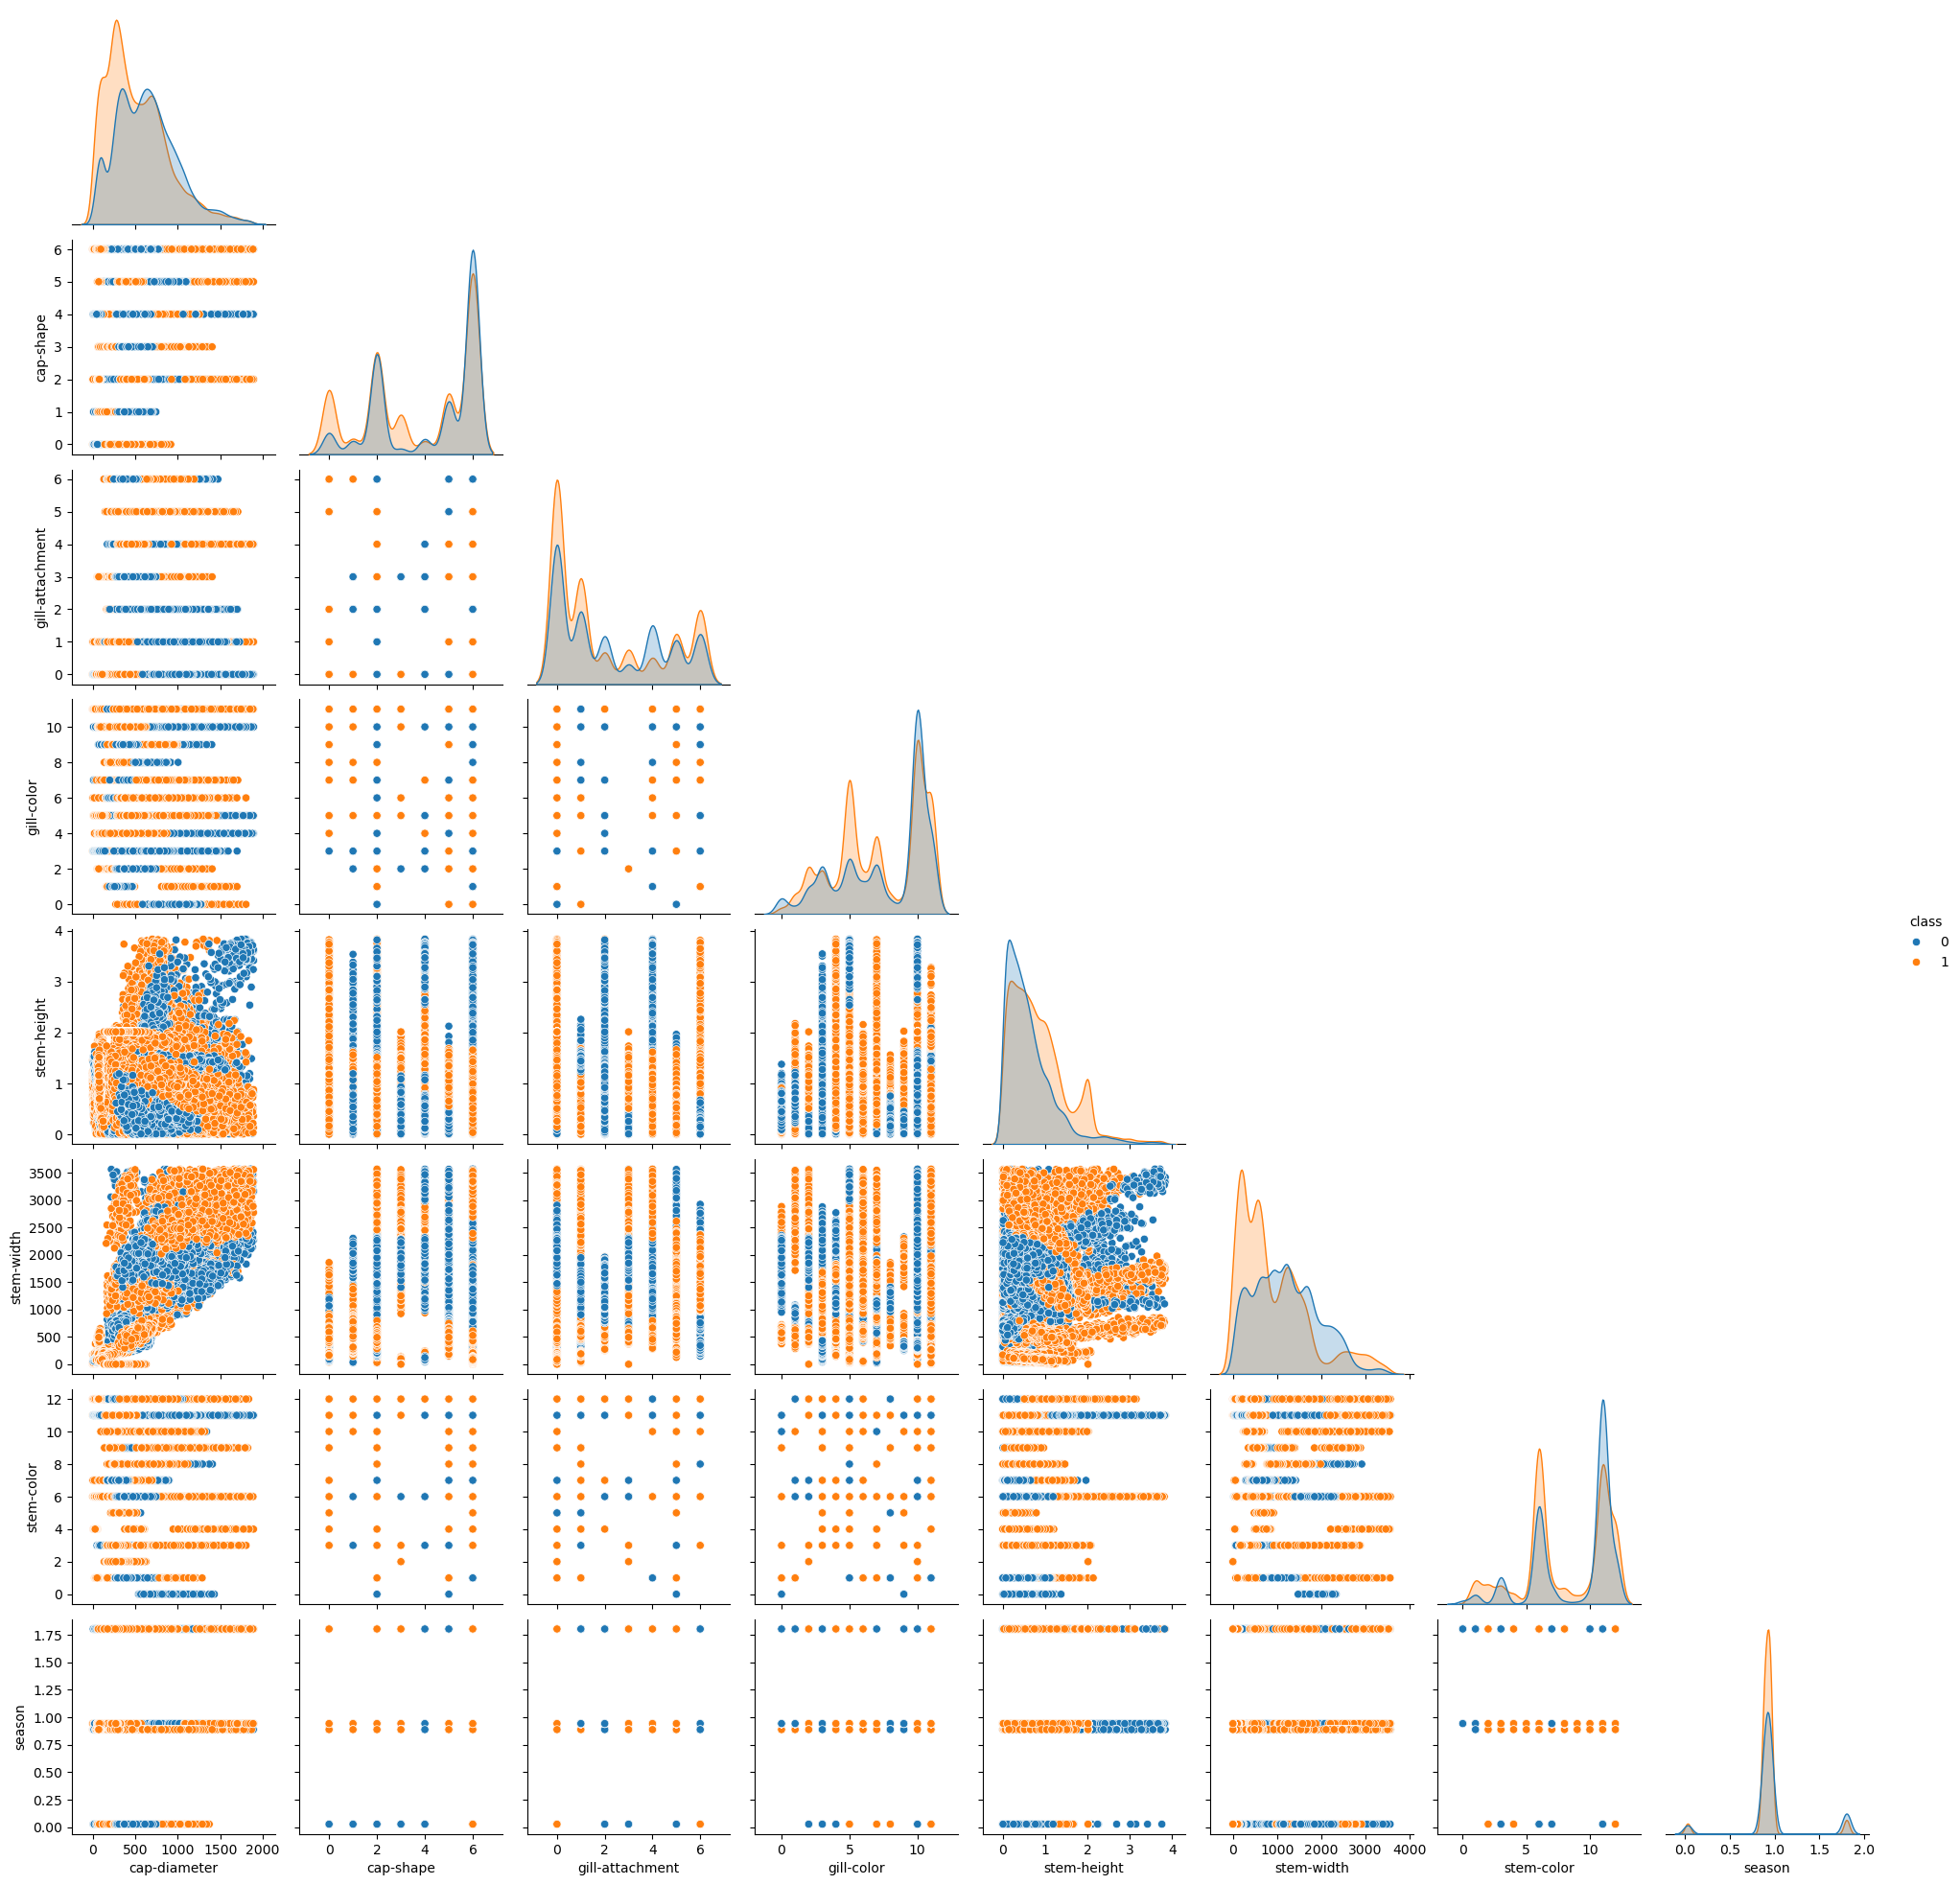

In [280]:
sns.pairplot(df, hue="class", corner=True)

In [281]:
r2 = r2_score(y_test, pred) 
r2

0.9600615570973957

In [282]:
f1_score(y_test, pred, average='binary')

0.990945248370991

**# TESTING SECONDARY DATA FOR COMPLETION**

6. Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

In [283]:
df_second.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [284]:
df_dropped = df_second.dropna(how="all")
dropped_list = ["stem-root","veil-type","veil-color","stem-surface","spore-print-color"]
df_dropped = df_dropped.drop(columns=dropped_list)

In [285]:
df_dropped.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [286]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             58598 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [287]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [288]:
categorical_data = df_dropped.select_dtypes(include=['object']).columns.tolist()[1:]

In [289]:
hot_encoded = enc.fit_transform(df_dropped[categorical_data])

In [290]:
hot_encoded_df = pd.DataFrame(hot_encoded, columns=enc.get_feature_names_out(categorical_data))

In [291]:
df_encoded = pd.concat([df_dropped, hot_encoded_df], axis=1)
df_encoded = df_encoded.drop(categorical_data, axis=1)

In [292]:
df_encoded["class"] = pd.get_dummies(df_encoded["class"], dtype="int", drop_first=True)

In [309]:
features = df_encoded.select_dtypes(include="number").drop(columns=["class"])
target = df_encoded["class"]

In [310]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(features, target, test_size=0.2, random_state=42)

In [341]:
df_encoded.head(3).T

,0,1,2
class,1.00,1.00,1.00
cap-diameter,15.26,16.60,14.07
stem-height,16.95,17.99,17.80
stem-width,17.09,18.19,17.74
cap-shape_b,0.00,0.00,0.00
...,...,...,...
habitat_w,0.00,0.00,0.00
season_a,0.00,0.00,0.00
season_s,0.00,0.00,0.00
season_u,0.00,1.00,0.00


In [311]:
knn10.fit(X_train_second, y_train_second)

KNeighborsClassifier(n_neighbors=10)

In [312]:
knn10.score(X_test_second, y_test_second)

0.9987719010971017

In [313]:
clf = tree.DecisionTreeClassifier(random_state = 42)

In [314]:
clf_tree = clf.fit(X_train_second, y_train_second)

In [315]:
clf.score(X_test_second, y_test_second)

0.9970525626330441

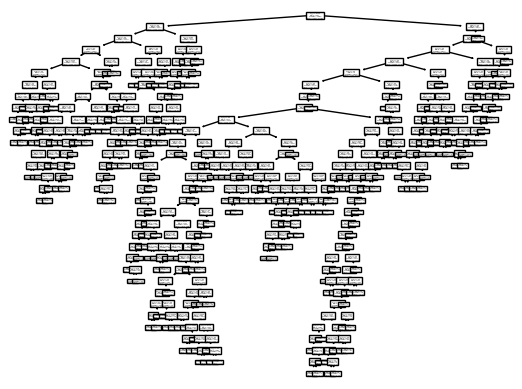

In [316]:
tree.plot_tree(clf_tree)
plt.show()

In [317]:
import lightgbm as lgb

In [338]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-1,random_state=42)
model.fit(X_train_second, y_train_second, eval_set=[(X_test_second, y_test_second),(X_train_second, y_train_second)],eval_metric='logloss')

[LightGBM] [Info] Number of positive: 27048, number of negative: 21807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 48855, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553638 -> initscore=0.215382
[LightGBM] [Info] Start training from score 0.215382


LGBMClassifier(learning_rate=0.09, random_state=42)

In [339]:
model.score(X_test_second, y_test_second)

0.998526281316522

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

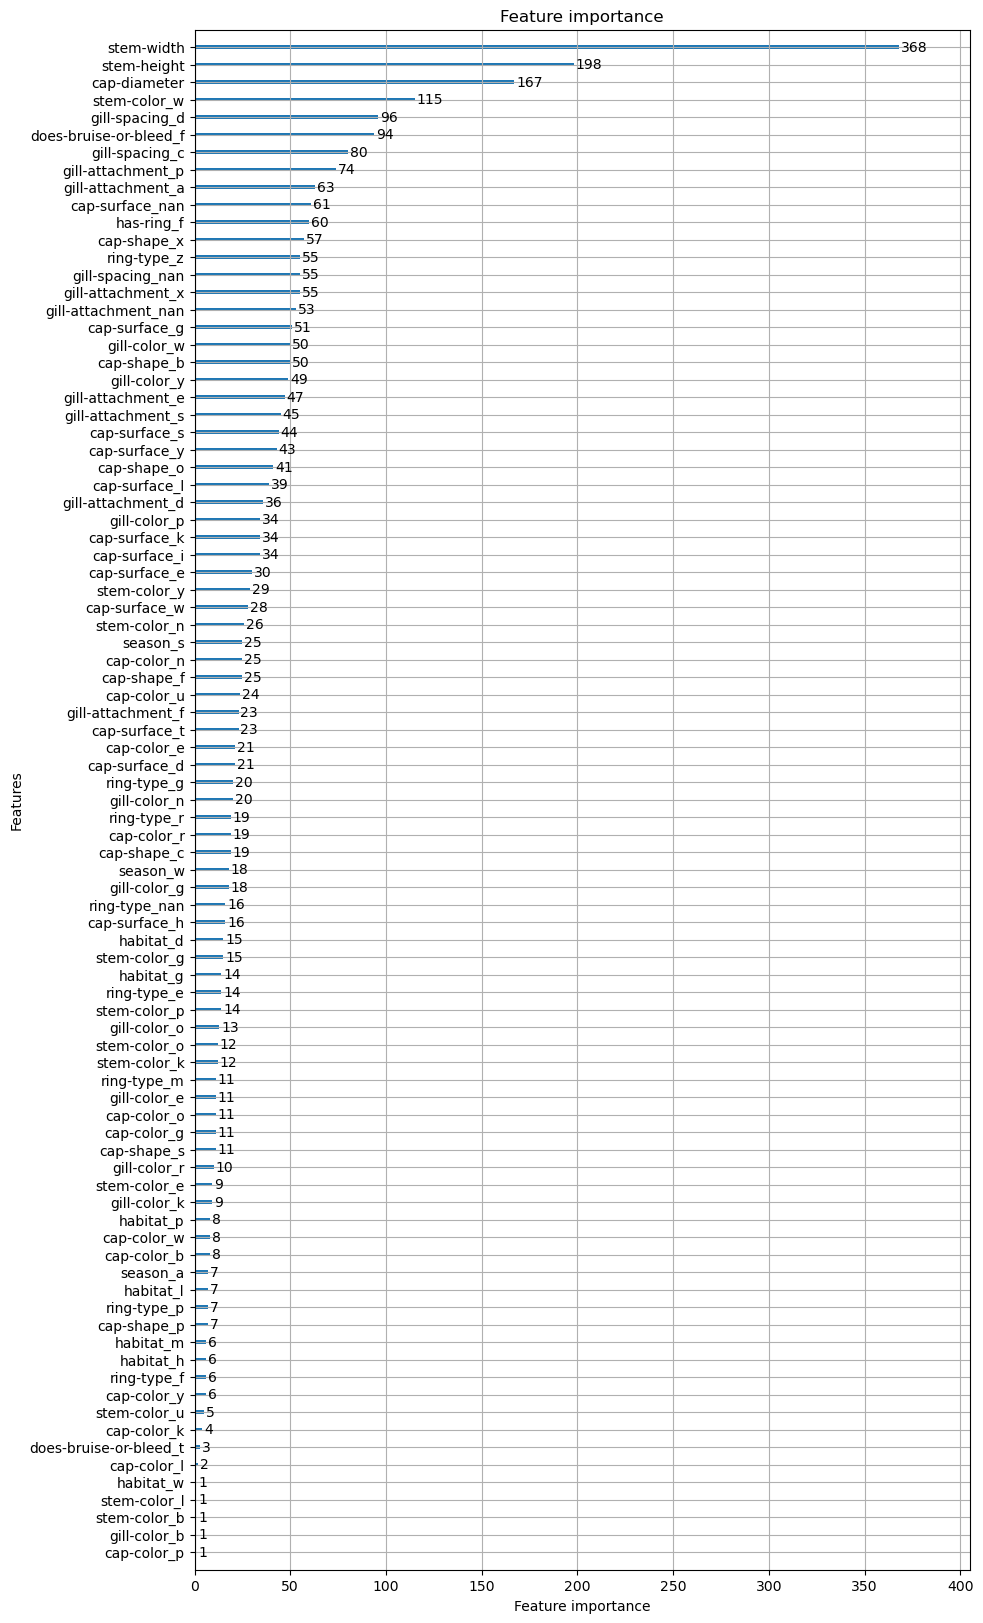

In [340]:
lgb.plot_importance(model, figsize=(10,20))

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

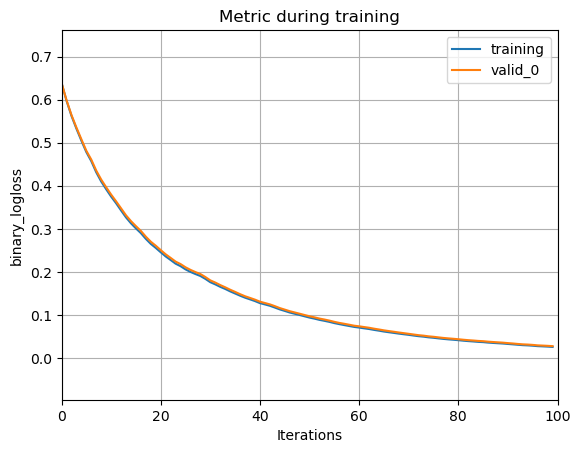

In [321]:
lgb.plot_metric(model)

In [322]:
print(metrics.classification_report(y_test_second,model.predict(X_test_second)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

